# FBProphet
## Algoritmo para forecast de timeserias desenvolvido pelo facebook
### Este trabalho foi baseado na seguinte fonte:
### https://facebook.github.io/prophet/docs
### https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fbprophet import Prophet
# statsmodels==0.8.0
from itertools import product
#
plt.style.use('fivethirtyeight')
# Aumentar o gráfico
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (100,100)
%matplotlib notebook

In [2]:
df = pd.read_csv('Usina.csv', parse_dates=True, index_col='dataHora' )
# Considerar os dados somente a partir de 01/03
df = df.truncate(before='2018-03-01').reset_index()
##
print("Exemplo")
print(df.head())
print("Verificando se os tipos de dados estão ok. Esperado um tipo data e um valor")
print(df.dtypes)
df['dataHora'] = pd.DatetimeIndex(df['dataHora'])
df.dtypes
# FBProphet precisa que as colunas se chamem df (a com o tempo) e y a do valor
df = df.rename(columns={'dataHora': 'ds',
                        'valor': 'y'})

print("DataFrame prepadrado para o FBProhet")
df.head(5)

Exemplo
             dataHora  valor
0 2018-03-01 00:00:00    0.0
1 2018-03-01 00:05:00    0.0
2 2018-03-01 00:10:00    0.0
3 2018-03-01 00:15:00    0.0
4 2018-03-01 00:20:00    0.0
Verificando se os tipos de dados estão ok. Esperado um tipo data e um valor
dataHora    datetime64[ns]
valor              float64
dtype: object
DataFrame prepadrado para o FBProhet


,ds,y
0,2018-03-01 00:00:00,0.0
1,2018-03-01 00:05:00,0.0
2,2018-03-01 00:10:00,0.0
3,2018-03-01 00:15:00,0.0
4,2018-03-01 00:20:00,0.0


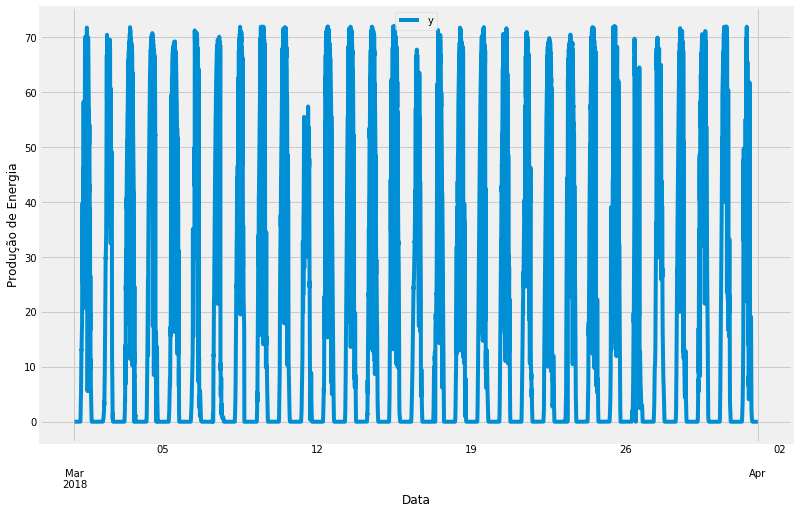

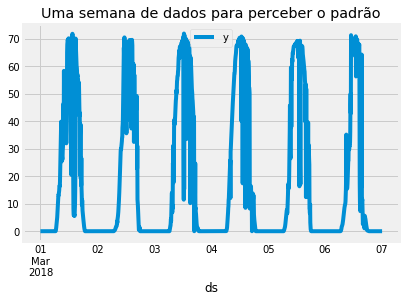

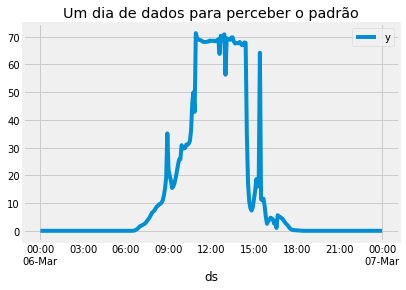

In [3]:
# Visualizando os dados
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Produção de Energia')
ax.set_xlabel('Data')

plt.show()
# Visualizando só a uma semana:
#
semana = df.set_index('ds').truncate(before='2018-03-01', after='2018-03-07')
semana.plot()
plt.title('Uma semana de dados para perceber o padrão')
plt.show()
# Visualizando um dia
semana = df.set_index('ds').truncate(before='2018-03-06', after='2018-03-07')
semana.plot()
plt.title('Um dia de dados para perceber o padrão')
plt.show()


In [4]:
# setando o intervalo de incerteza para  95% (o default do Prophet default é 80%) , resolução de 5 minutos
meu_modelo = Prophet( interval_width=0.95 , changepoint_prior_scale=0.01)
meu_modelo.add_seasonality(name='dayly', period=1, fourier_order=5)

In [5]:
meu_modelo.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
#dtas_futuras = meu_modelo.make_future_dataframe(periods=36, freq='M')
datas_futuras = meu_modelo.make_future_dataframe(periods=100, freq='H')
datas_futuras.tail()


,ds
9023,2018-04-04 23:55:00
9024,2018-04-05 00:55:00
9025,2018-04-05 01:55:00
9026,2018-04-05 02:55:00
9027,2018-04-05 03:55:00


In [7]:
forecast = meu_modelo.predict(datas_futuras)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#    ds: a data da predição
#    yhat: o valor predito
#    yhat_lower: margem inferior para forecast
#    yhat_upper: margem superior para forecast


,ds,yhat,yhat_lower,yhat_upper
9023,2018-04-04 23:55:00,-1.511306,-21.389974,18.206875
9024,2018-04-05 00:55:00,-1.809199,-20.591474,18.402905
9025,2018-04-05 01:55:00,-2.252550,-21.985869,18.280078
9026,2018-04-05 02:55:00,-1.804251,-23.182684,19.408023
9027,2018-04-05 03:55:00,-1.224666,-22.278952,18.478087


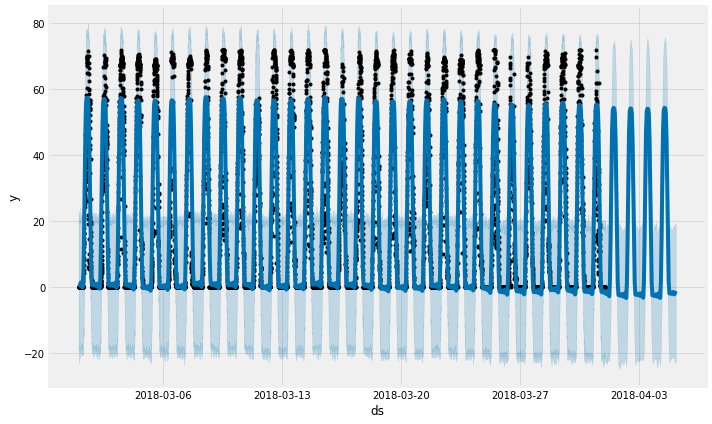

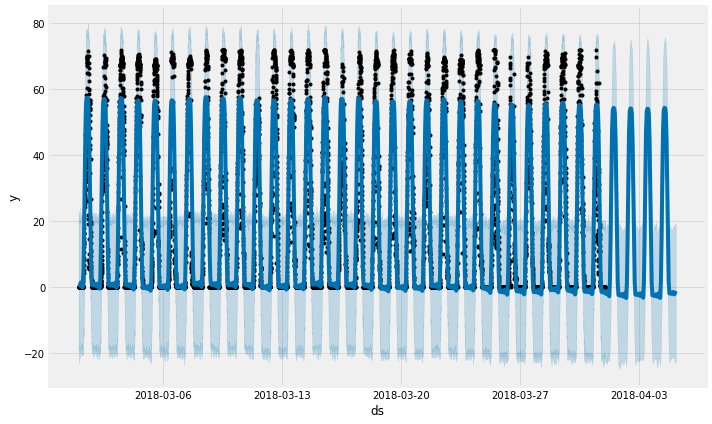

In [8]:
meu_modelo.plot(forecast,
                uncertainty=True)


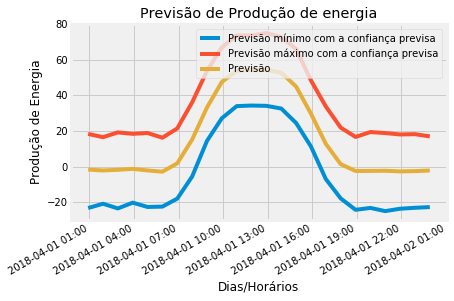

In [9]:
# Previsão nos dois primeiros dias do mes 4
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#    ds: a data da predição
#    yhat: o valor predito
#    yhat_lower: margem inferior para forecast
#    yhat_upper: margem superior para forecast
# ds                     datetime64[ns]
# trend                         float64
# trend_lower                   float64
# trend_upper                   float64
# yhat_lower                    float64
# yhat_upper                    float64
# daily                         float64
# daily_lower                   float64
# daily_upper                   float64
# dayly                         float64
# dayly_lower                   float64
# dayly_upper                   float64
# seasonal                      float64
# seasonal_lower                float64
# seasonal_upper                float64
# seasonalities                 float64
# seasonalities_lower           float64
# seasonalities_upper           float64
# weekly                        float64
# weekly_lower                  float64
# weekly_upper                  float64
# yhat                          float64

import matplotlib.dates as md

plt.title('Previsão de Produção de energia')
dias=forecast.set_index('ds').truncate(before='2018-04-01', after='2018-04-02')[['yhat','yhat_lower','yhat_upper']]
dias['yhat_lower'].plot(label='Previsão mínimo com a confiança previsa')
dias['yhat_upper'].plot(label='Previsão máximo com a confiança previsa')
dias['yhat'].plot(label='Previsão')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.legend(loc='upper right')
plt.ylabel('Produção de Energia')
plt.xlabel('Dias/Horários')
plt.show()

Componentes Separados


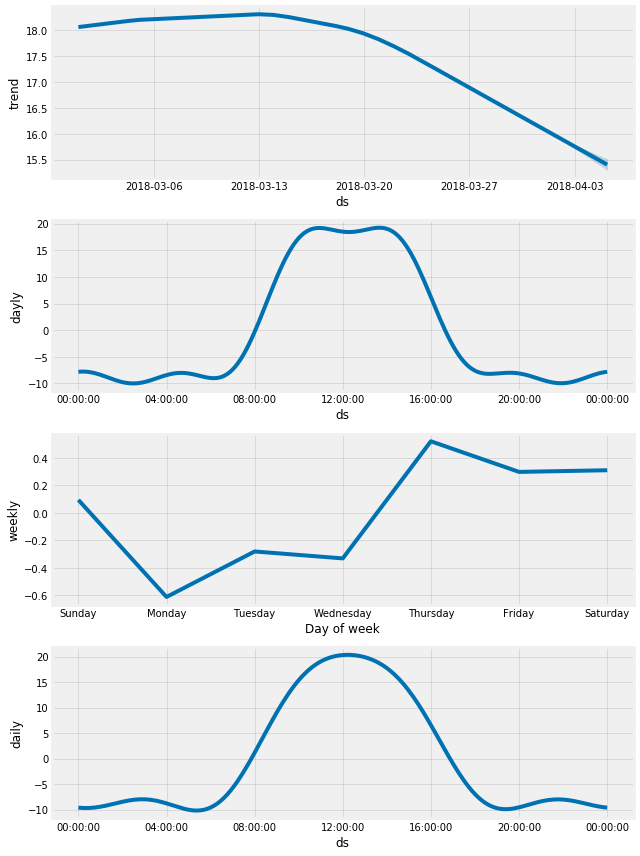

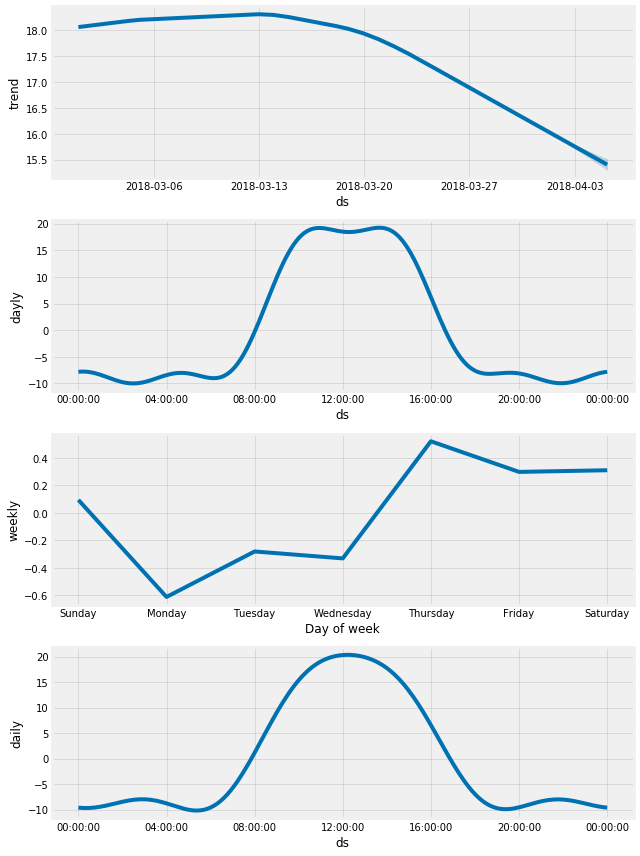

In [10]:
print("Componentes Separados")
meu_modelo.plot_components(forecast)

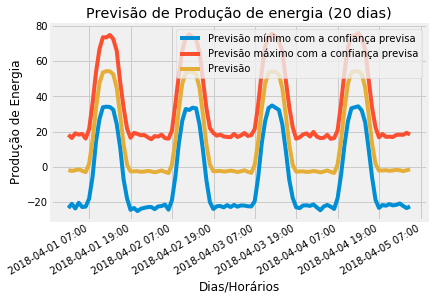

In [11]:



plt.title('Previsão de Produção de energia (20 dias)')
dias=forecast.set_index('ds').truncate(before='2018-04-01', after='2018-04-20')[['yhat','yhat_lower','yhat_upper']]
dias['yhat_lower'].plot(label='Previsão mínimo com a confiança previsa')
dias['yhat_upper'].plot(label='Previsão máximo com a confiança previsa')
dias['yhat'].plot(label='Previsão')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.legend(loc='upper right')
plt.ylabel('Produção de Energia')
plt.xlabel('Dias/Horários')
plt.show()

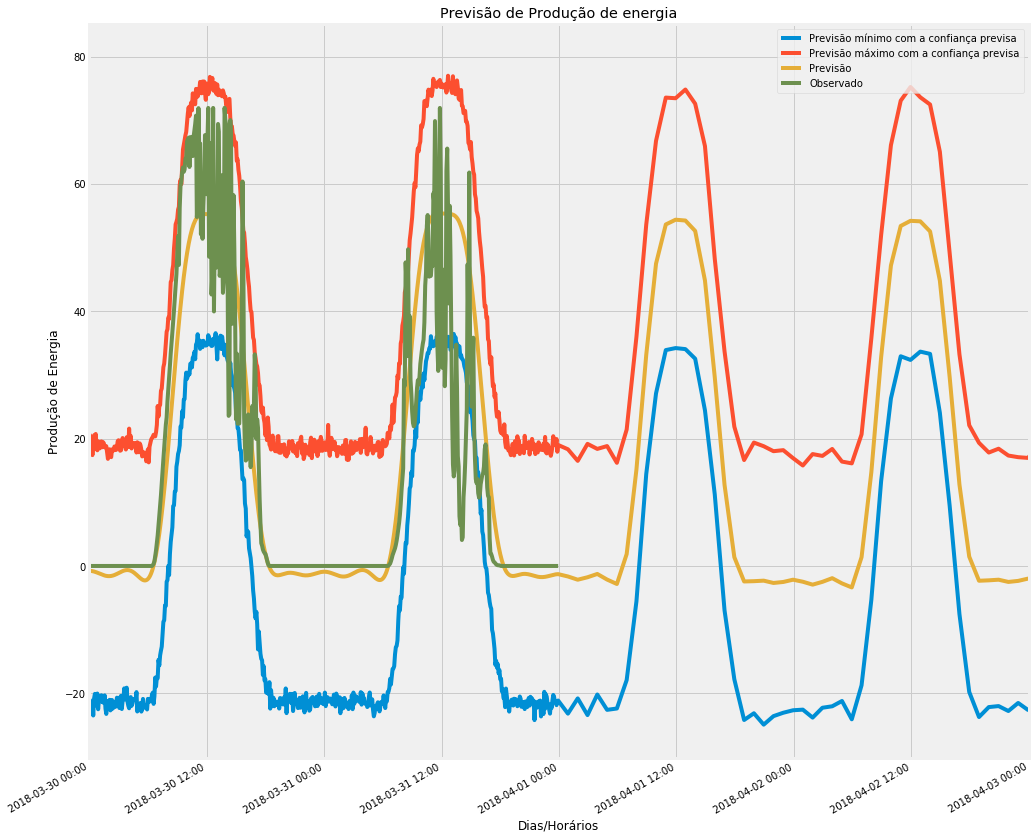

In [23]:

mpl.rcParams['figure.figsize'] = (15,15)
plt.title('Previsão de Produção de energia')
dias=forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]
dias['yhat_lower'].plot(label='Previsão mínimo com a confiança previsa')
dias['yhat_upper'].plot(label='Previsão máximo com a confiança previsa')
dias['yhat'].plot(label='Previsão')
df.set_index('ds')['y'].plot(label='Observado')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.legend(loc='upper right')
ax.set_xlim('2018-03-30','2018-04-03')
plt.ylabel('Produção de Energia')
plt.xlabel('Dias/Horários')
plt.show()